# Quantum Engineering Design Initiative (QEDi)
## Superconducting Qubit Workshop 2025
Date: 15th - 16th September 2025


This workshop will focus on introducing you to QuTiP, a python package used for simulating quantum systems. The aims for this workshop are:


*   Define and manipulate a quantum system using QuTiP
*   Extract eigenstates of a Quantum Harmonic Oscillator
*   Understand qubit rotations and Hamiltonian-induced dynamics on a Bloch sphere
*   Understand how to implement physical gate operations on a qubit
*   Extract $T_1$ and $T_2$ times of a qubit coupled to an environment via Rabi and Ramsey measurements



In [ ]:
!pip install qutip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.8/31.8 MB 54.9 MB/s eta 0:00:00


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
from qutip import (Qobj, about, basis, coherent, coherent_dm, create, destroy,
                   expect, fock, fock_dm, mesolve, qeye, sigmax, sigmay,
                   sigmaz, tensor, thermal_dm, Bloch, sesolve, sigmap, sigmam, mcsolve, num)
# set a parameter to see animations in line
from matplotlib import rc
rc('animation', html='jshtml')
from qutip.ipynbtools import plot_animation

%matplotlib inline

# QuTiP Fundamentals

All states and operators are defined as **Qobj** objects. These are essentially matrices, but with added functionality via QuTiP.



QuTiP offers predefined functions and objects to create states and operators. We will have a go at using them below.

We can define a qubit's $|0\rangle$ state as:

In [12]:
N = 2 # The total number of states in the Hilbert space (N=2 is a two level system)
n = 0 # The state that we want to be occupied (n = 0 is |0> state, n = 1 is |1> state)

state_0 = basis(N, n)
print(state_0)

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]


We can then visualise it on the Bloch sphere

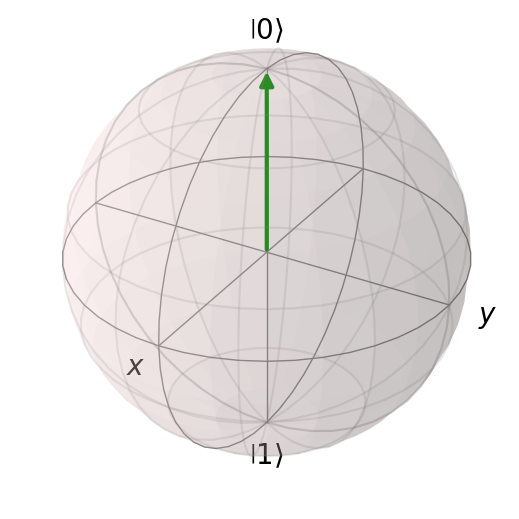

In [13]:
b = Bloch()
b.add_states(state_0)
b.show()

Have a go at defining a qubit's $|1\rangle$ state

In [14]:
N = 2
n = # fill this out

state_1 = # fill this out
print(state_1)

SyntaxError: invalid syntax (2915996061.py, line 2)

In [15]:
b = Bloch()
b.add_states( # fill this out
b.show()

SyntaxError: incomplete input (1288217631.py, line 3)

## Superposition States

The main superpositions states to know are:

$|+\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$

$|-\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)$

$|i\rangle = \frac{1}{\sqrt{2}}(|0\rangle + i|1\rangle)$

$|-i\rangle = \frac{1}{\sqrt{2}}(|0\rangle - i|1\rangle)$


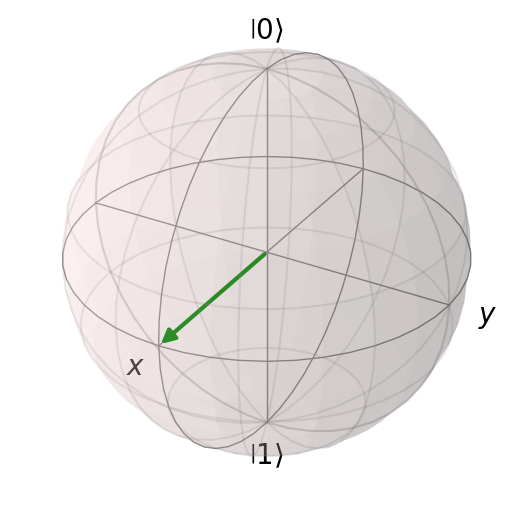

In [16]:
state_plus = (basis(2, 0) + basis(2, 1)).unit() # this normalises the vectors
b = Bloch()
b.add_states(state_plus)
b.show()

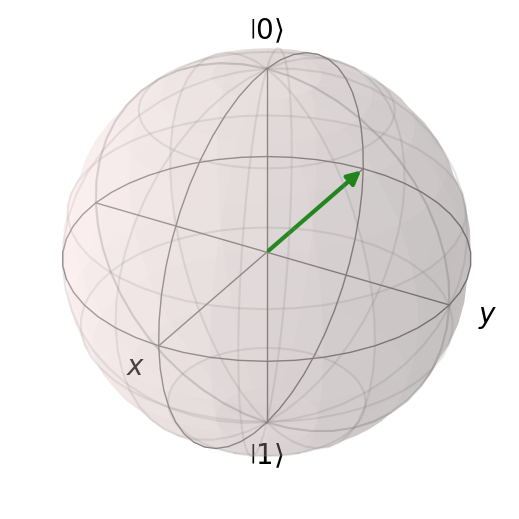

In [17]:
state_minus = (basis(2, 0) - basis(2, 1)).unit() # this normalises the vectors
b = Bloch()
b.add_states(state_minus)
b.show()

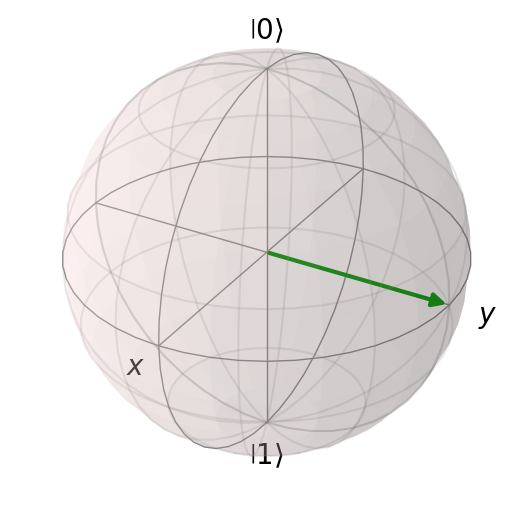

In [18]:
state_plus_i = (basis(2, 0) + 1j*basis(2, 1)).unit() # this normalises the vectors
b = Bloch()
b.add_states(state_plus_i)
b.show()

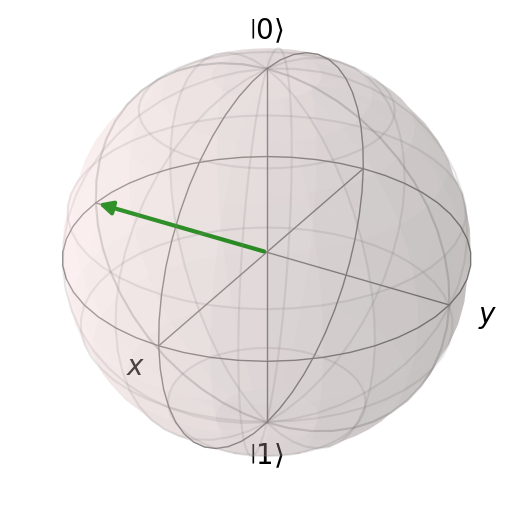

In [19]:
state_minus_i = (basis(2, 0) - 1j*basis(2, 1)).unit() # this normalises the vectors
b = Bloch()
b.add_states(state_minus_i)
b.show()

# Quantum Harmonic Oscillator

First we define some parameters.

In [20]:
hbar = 1.0      # Reduced Planck's constant
m = 1.0        # Mass of the particle
omega = 1.0     # Angular frequency of the oscillator

N = 500 # Size of the Hilbert space


# Necessary operators

a = destroy(N)
adag = create(N)
n_op = num(N)

Next we define the Hamiltonian:

$\hat{H} = \hbar\omega (\hat{n} + 0.5)$

In [21]:
H = hbar * omega * (n_op + 0.5 * qeye(N))

We then define the position operator in terms of the annihilation and creation operator.

In [22]:
x_op = np.sqrt(hbar / (2 * m * omega)) * (a + adag)

Extract the eigenvalues and eigenstates in position space and energy space.

In [23]:
x_evals, x_kets = x_op.eigenstates()
evals, ekets = H.eigenstates()

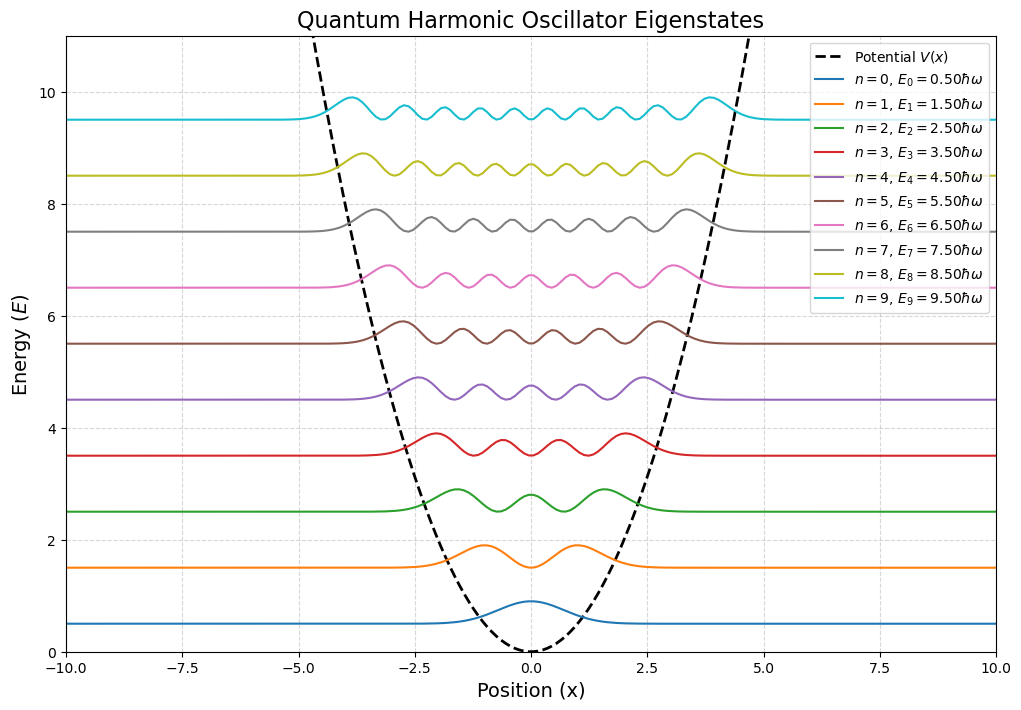

In [40]:
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the potential energy well: V(x) = 0.5 * m * omega^2 * x^2
potential = 0.5 * m * omega**2 * x_evals**2
ax.plot(x_evals, potential, 'k--', linewidth=2, label='Potential $V(x)$')

# Plot the first 10 eigenstates
num_states_to_plot = 10
for n in range(num_states_to_plot):
    E_n = evals[n]
    psi_n = ekets[n]

    # Project onto the position basis to get the wavefunction psi(x)
    psi_n_x = np.array([(x_ket.dag() * psi_n) for x_ket in x_kets])
    prob_density = np.abs(psi_n_x)**2

    scaling = 0.4 / prob_density.max() # This is just for visually plotting the wavefunction.
    ax.plot(x_evals, np.squeeze(scaling * prob_density + E_n), label=f'$n={n}$, $E_{n} = {E_n:.2f}\\hbar\\omega$')

ax.set_title('Quantum Harmonic Oscillator Eigenstates', fontsize=16)
ax.set_xlabel('Position (x)', fontsize=14)
ax.set_ylabel('Energy ($E$)', fontsize=14)
ax.legend(loc='upper right')
ax.grid(True, linestyle='--', alpha=0.5)
ax.set_xlim(-10, 10)
ax.set_ylim(0, evals[num_states_to_plot] + 0.5) # Start y-axis at 0
plt.show()

See what happens when you change some of the values like $\omega$ and $m$.

# Time Evolution of a Qubit via Hamiltonian

We will have a look at how the |+> state evolves under the Hamiltonian:

$\hat{H} = \sigma_z$

This is a common Hamiltonian, typically used to simulate spin dynamics in a magnetic field. This will cause the |+> to precess around the z-axis of the Bloch sphere - also known as Larmor Precession.

In [25]:
# simulate the unitary dynamics
H = sigmaz()
times = np.linspace(0, 10, 100)

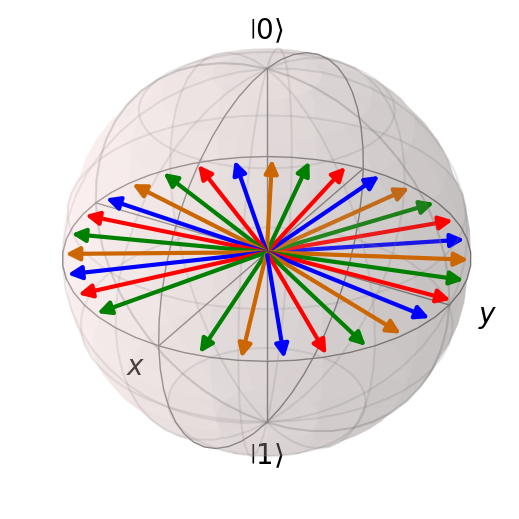

In [27]:
result = sesolve(H, state_plus, times, e_ops=[]) # Leaving the _e_ops list empty will return the state vector
b = Bloch()
b.add_states(result.states[1:30])
b.show()

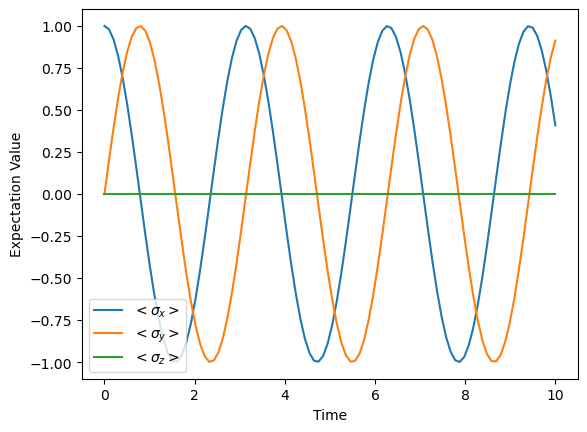

In [28]:
result = sesolve(H, state_plus, times, e_ops = [sigmax(), sigmay(), sigmaz()]) # The expectation values will be calculated for the operators in the _e_ops list
plt.plot(times, result.expect[0], label = "$<\sigma_x>$")
plt.plot(times, result.expect[1], label = "$<\sigma_y>$")
plt.plot(times, result.expect[2], label = "$<\sigma_z>$")
plt.xlabel("Time"), plt.ylabel("Expectation Value")
plt.legend()
plt.show()

Have a go at changing the state and the Hamiltonian to see how the dynamics change. (Keep the state as a two level system, but do test superposition states.)

In [29]:
state = # define your state
H = # define your Hamiltonian
times = np.linspace(0, 10, 100)

# This will plot the Bloch sphere dynamics
result = sesolve(H, state, times, _e_ops=[])
b = Bloch()
b.add_states(result.states[1:30])
b.show()

# This will plot the expectation values of the sx, sy and sz operators.
result = sesolve(H, state, times, _e_ops = [sigmax(), sigmay(), sigmaz()])
plt.plot(times, result.expect[0], label = "$<\sigma_x>$")
plt.plot(times, result.expect[1], label = "$<\sigma_y>$")
plt.plot(times, result.expect[2], label = "$<\sigma_z>$")
plt.xlabel("Time"), plt.ylabel("Expectation Value")
plt.legend()
plt.show()

SyntaxError: invalid syntax (3003189443.py, line 1)

# Driven Qubit Model and Gate Operations

Here we will make a generic qubit, and learn how we can design single qubit gates on it!

In [30]:
qubit = basis(2, 0)

We are going to use the driven qubit model.

Remember the qubit Hamiltonian takes the following form:
$\hat{H}_{qubit} = \frac{-\hbar\omega_q}{2}\hat{\sigma}_z$

The qubit drive interaction is: $\hat{H}_{drive}(t) = \hbar \Omega \cos(\omega_d t)\hat{\sigma}_x$

$\Omega$ is the Rabi frequency.

The total Hamiltonian takes the form:

$\hat{H}(t) = \frac{-\hbar\omega_q}{2}\hat{\sigma}_z + \hbar \Omega \cos(\omega_d t)\hat{\sigma}_x$

Then we take it into the rotating frame of the drive frequency $\omega_d$ and apply the Rotating Wave Approximation. This assumes that the drive frequency is near resonance to the qubit ($\omega_d \approx \omega_q$) and weakly driven ($\Omega \ll \omega_q$). The detuning is then given as $\Delta = \omega_q - \omega_d$.

$\hat{H}(t) = -\frac{\Delta}{2}\hat{\sigma}_z + \frac{\Omega(t)}{2}\hat{\sigma}_x$

In [31]:
detuning = 0
rabi_freq = 2*np.pi

H = -(detuning/2)*sigmaz() + (rabi_freq/2)*sigmax()

print(H)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.         3.14159265]
 [3.14159265 0.        ]]


Change the stop point of the time above and see how the evolution changes in the Bloch sphere.

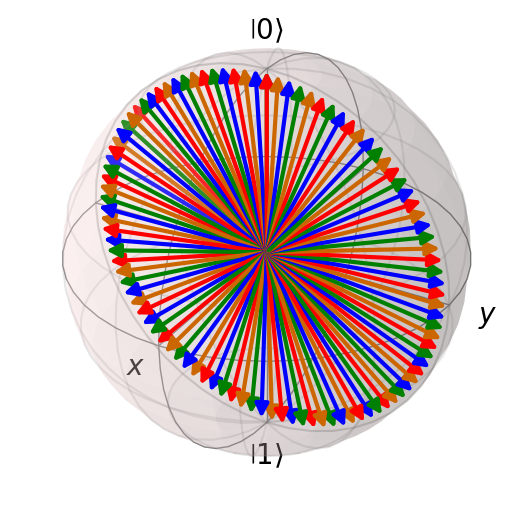

In [33]:
times = np.linspace(0, 2, 100) # time is in kinda arbitrary units here
result = sesolve(H, qubit, times, e_ops=[])
b = Bloch()
b.add_states(result.states)
b.show()

The Hadamard gate is the most fundamental gate to perform for quantum computing. Earlier, we had a look at how the Hadamard gate as a matrix evolves a state on the Bloch sphere. Below we will implement this gate using this driven qubit model.

Remember: Matrices are not physical objects to apply on a qubit. We need to design them using clever tricks in the real world.

**We will only use information that we can physically observe to realise this.** i.e. the computational basis.

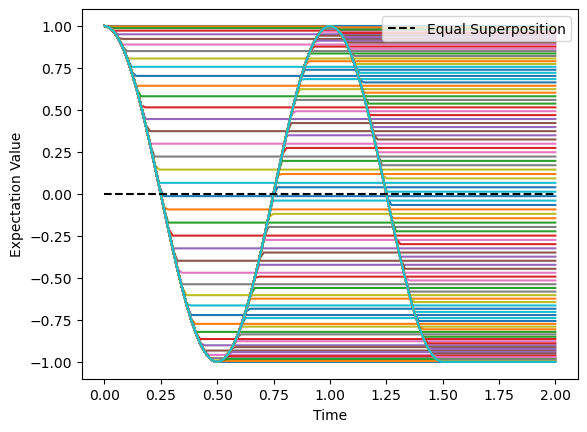

In [35]:
gate_times_array = np.linspace(0, 3 * (np.pi) / rabi_freq, 120)

for gate_time in gate_times_array:
  def pulse_shape(t, args):
      if t >= 0 and t <= gate_time:
          return 1.0
      else:
          return 0.0

  result = sesolve([[H, pulse_shape]], qubit, times, e_ops=[sigmaz()])
  plt.plot(times, result.expect[0])

plt.plot(times, [0]*len(times), "--", color = "black", label = "Equal Superposition")
plt.xlabel("Time"), plt.ylabel("Expectation Value")
plt.legend(loc = 'upper right')
plt.show()

# Rabi and Ramsey Spectroscopy

### Rabi Measurement

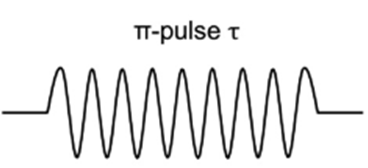

In [36]:
T1_true = 4
T_phi_true = 12
T2_true = 1.0 / ((1.0 / (2.0 * T1_true)) + (1.0 / T_phi_true))
detuning = 0.5 * np.pi
rabi_freq = 4*np.pi

psi0 = basis(2, 0)

pi_half_time = (np.pi/2) / rabi_freq

gamma_relax = 1.0 / T1_true
gamma_dephase = 1.0 / T_phi_true
c_ops = [np.sqrt(gamma_relax) * destroy(2), np.sqrt(gamma_dephase) * sigmaz()]

H = -(detuning/2)*sigmaz() + (rabi_freq/2)*sigmax()

gate_time = (np.pi) / rabi_freq # pi pulse

times = np.linspace(0.0, 10.0, 501)

e_ops = [sigmap() * sigmam()]

result = mesolve(H, psi0, times, c_ops, e_ops)

decay_data = result.expect[0]

[ 3.6875038   0.49222722 12.66420959 -0.02171449  0.50718432]


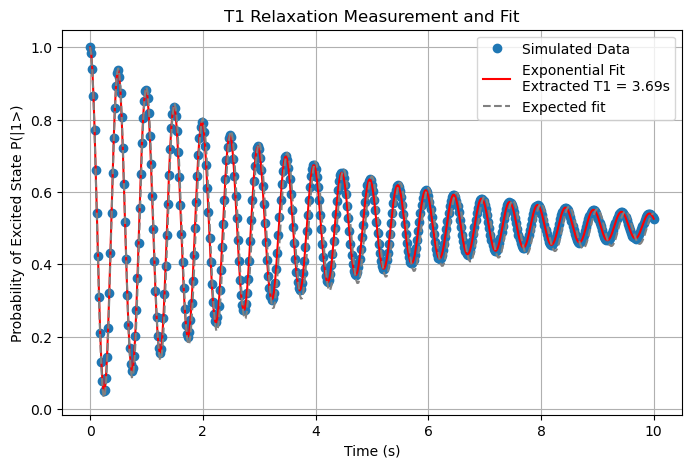

Set T1 time: 4.363636363636364s
Extracted T1 Time from fit: 3.6875s


In [37]:
from scipy.optimize import curve_fit

def damped_cosine(t, tau, A, freq, phi, B):
    return A * np.exp(-t / tau) * np.cos(freq * t + phi) + B


initial_guess = [T1_true, 0.5, np.pi*2,0, 0.5]
fit_params, _ = curve_fit(damped_cosine, times, decay_data, p0=initial_guess, maxfev = 10000)
print(fit_params)
T_rabi_extracted = fit_params[0]

plt.figure(figsize=(8, 5))
plt.plot(times, decay_data, 'o', label='Simulated Data')
plt.plot(times, damped_cosine(times, *fit_params), 'r-', label=f'Exponential Fit\nExtracted T1 = {T_rabi_extracted:.2f}s')
plt.plot(times, damped_cosine(times, *[T1_true, 0.5, np.pi*4, 0, 0.5]), '--', color= "grey", label=f'Expected fit')
plt.title("T1 Relaxation Measurement and Fit")
plt.xlabel("Time (s)")
plt.ylabel("Probability of Excited State P(|1>)")
plt.legend()
plt.grid(True)
plt.show()

print(f"Set T1 time: {1/(0.5*((1/T1_true) + (1/T2_true)))}s")
print(f"Extracted T1 Time from fit: {T_rabi_extracted:.4f}s")


### Ramsey Measurement

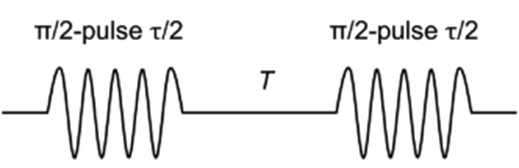

In [38]:
H0 = - (detuning / 2.0) * sigmaz()
H1 = (rabi_freq / 2.0) * sigmax()

def ramsey_pulse_shape(t, args):
    tau = args['tau']; return 1.0 if (0 <= t <= pi_half_time) or ((pi_half_time + tau) <= t <= (2 * pi_half_time + tau)) else 0.0
H = [H0, [H1, ramsey_pulse_shape]]



e_ops = [sigmap() * sigmam()]
tau_list = np.linspace(0, 4.0, 51)
ramsey_data = []

for tau in tau_list:
    total_time = 2 * pi_half_time + tau
    result = mesolve(H, psi0, [0, total_time], c_ops, e_ops, args={'tau': tau})
    ramsey_data.append(1 - result.expect[0][-1])



[3.41547576 0.47739083 1.57106769 0.24684411 0.48908366]


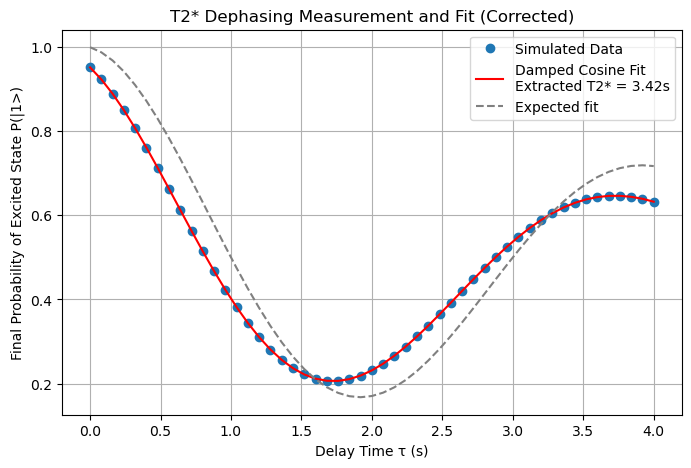

Theoretical T2* time: 4.8000s
Extracted T2* time from fit: 3.4155s


In [39]:
def damped_cosine(t, tau, A, freq, phi, B):
    return A * np.exp(-t / tau) * np.cos(freq * t + phi) + B



initial_guess = [T2_true, 0.5, detuning, 0, 0.5]
fit_params, _ = curve_fit(damped_cosine, tau_list, ramsey_data, p0=initial_guess)

T2_star_extracted = fit_params[0]
print(fit_params)
plt.figure(figsize=(8, 5))
plt.plot(tau_list, ramsey_data, 'o', label='Simulated Data')
plt.plot(tau_list, damped_cosine(tau_list, *fit_params), 'r-',
         label=f'Damped Cosine Fit\nExtracted T2* = {T2_star_extracted:.2f}s')
plt.plot(tau_list, damped_cosine(tau_list, *[T2_true, 0.5, detuning, 0, 0.5]), '--', color = "grey",
         label=f'Expected fit')
plt.title("T2* Dephasing Measurement and Fit (Corrected)")
plt.xlabel("Delay Time τ (s)")
plt.ylabel("Final Probability of Excited State P(|1>)")
plt.legend()
plt.grid(True)
plt.show()
print(f"Theoretical T2* time: {T2_true:.4f}s")
print(f"Extracted T2* time from fit: {T2_star_extracted:.4f}s")

We will now extract T1, T2 and T_Phi from the above results.

np.float64(0.2907448615656582)

np.float64(-0.694245141251727)